## 1. The Drift-Diffusion Model

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
dpi = 450 

In [7]:
# useful functions 

#derivative
def dx(I_a = 0.95, I_b = 1, sigma=7):
    return I_a - I_b + sigma*np.random.normal(0,1)

#euler step 
def euler_step(x, dx, dt=0.1, I_a = 0.95, I_b = 1, sigma=7):
    return x + dt*(dx(I_a,I_b,sigma))

#euler trajectory 
def euler_traj(N, x0, dx, dt=0.1, I_a = 0.95, I_b = 1, sigma=7):
    
    #initialize
    x_vals = np.zeros(N) 
    x_vals[0] = x0 
    
    #integrate
    for i in range(1,N):
        x_vals[i] = euler_step(x_vals[i-1], dx, dt, I_a, I_b, sigma)

    return x_vals

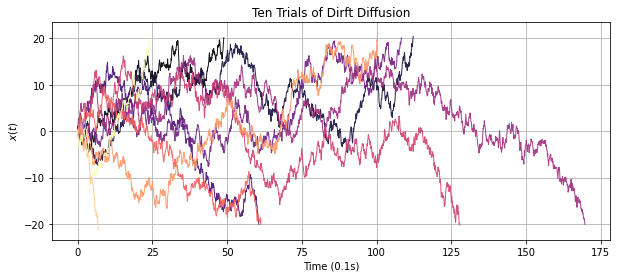

In [12]:
# 2.1 Simulate 

#fix random seed 
np.random.seed(1)

#set parameters 
sigma = 7 
I_a = 0.95; I_b = 1
mu = 20; n = 10 #threshold & num trials

#initialize time 
T = int(1e4); dt = 0.1 #num time step and time step time
t_vals = np.linspace(0,T*dt+dt, T)
                   
#initial cond
x0 = 0 

#initialize plot 
plt.figure(figsize=(10, 4))

#set colors 
cmap = plt.get_cmap('magma')
colors = cmap(np.linspace(0,1,n))

#run trial n times 
for i in range(n):
    
    #get x_traj 
    x_vals = euler_traj(T, x0, dx)

    #find where threshold is crossed for first timie 
    index = np.where(abs(x_vals)>mu)[0][0]

    #plot trajectory 
    plt.plot(t_vals[:index+1],x_vals[:index+1],color = colors[i], alpha = 0.9,linewidth=1)
    
#adjust plot 
plt.xlabel("Time (0.1s)");plt.ylabel("$x(t)$")
plt.title("Ten Trials of Dirft Diffusion")
plt.grid()
plt.savefig("figures/tendrift",dpi = dpi)


In [9]:
# 2.2 Simulate the Outcomes 

#simulation 
def simulation(n=100, T=int(1e4), x0=0, dt=0.1, I_a = 0.95, I_b = 1, sigma=7,mu=20):
    global dx 

    #counters 
    A_ctr = 0; B_ctr = 0; null_ctr =0 

    #simulate 
    for i in range(n): 

        #get x_traj 
        x_vals = euler_traj(T, x0, dx,dt, I_a, I_b, sigma)

        #find where threshold is crossed for first time 
        mask = np.where(abs(x_vals)>mu)[0]

        #check if decision made 
        if not mask.any(): 
            null_ctr+=1 #no decision counter 

        #else count which decision 
        else: 
            idx = np.where(abs(x_vals)>mu)[0][0]

            if x_vals[idx] > mu: 
                A_ctr+=1 
            else: 
                B_ctr+=1

    return np.array([A_ctr,B_ctr,null_ctr])

In [10]:
#1.2 Continues: Histogram 

#categories 
categories = ["Decision A", "Decision B", "No Decision Made"]
freq = simulation(1000)

[391 609   0] 0.391 0.609


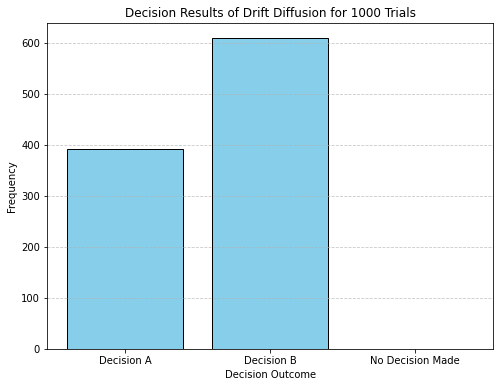

In [11]:
#create bar chart 
plt.figure(figsize=(8,6))
print(freq, freq[0]/1000,freq[1]/1000)
plt.bar(categories,freq,color='skyblue',edgecolor='black')
plt.xlabel("Decision Outcome"); plt.ylabel("Frequency")
plt.title("Decision Results of Drift Diffusion for 1000 Trials")

plt.grid(axis='y',linestyle='--', alpha=0.7)
plt.savefig("figures/freq1",dpi = dpi)
plt.show()

In [15]:
#1.3 Vary the Parameters, Part 1: mu 
#set mu_range
m = 100
mu_vals = np.linspace(1,100,m)

#initialize freq array 
freq_arr = np.zeros([3,m])

#run simulation 
for i,mu in enumerate(mu_vals): 
    #update frequency values 
    freq_arr[:,i] = simulation(mu=mu)

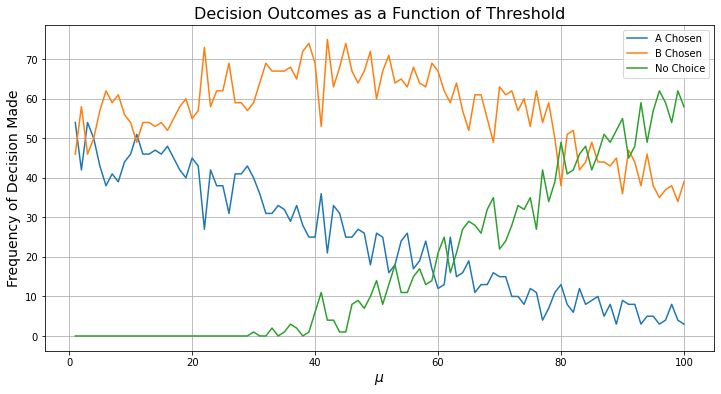

In [33]:
#plot frequencies as a function of mu 
plt.figure(figsize=(12,6))

#plot values
plt.plot(mu_vals, freq_arr[0,:],label = 'A Chosen')
plt.plot(mu_vals, freq_arr[1,:],label = 'B Chosen')
plt.plot(mu_vals, freq_arr[2,:],label = 'No Choice')

#labels 
plt.xlabel("$\mu$",fontsize=14) 
plt.ylabel("Frequency of Decision Made",fontsize=14)
plt.title("Decision Outcomes as a Function of Threshold", fontsize=16)
         
#formatting + show 
plt.legend(loc='best');plt.grid()
plt.savefig("figures/freqmu",dpi = dpi)
plt.show()

In [37]:
#1.3.2 Vary Sigma 
#set mu_range
m = 100
sig_vals = np.linspace(0,50,m)
np.random.seed(900)

#initialize freq array 
freq_arr2 = np.zeros([3,m])

#run simulation 
for i,sigma in enumerate(sig_vals): 
    #update frequency values 
    freq_arr2[:,i] = simulation(sigma = sigma)

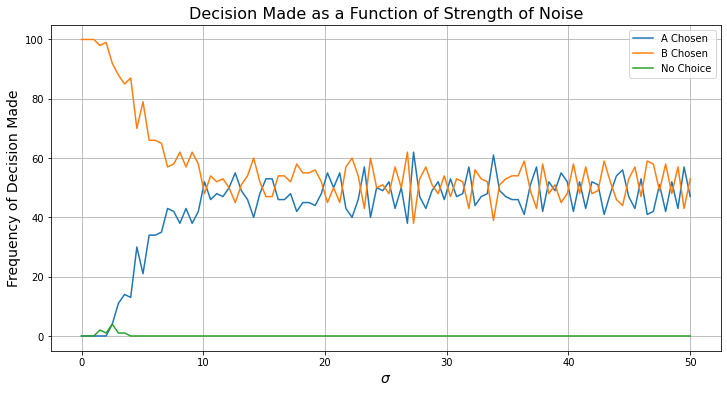

In [38]:
#plot frquencies as function of sigma 
plt.figure(figsize=(12,6))

#plot values 
plt.plot(sig_vals, freq_arr2[0,:],label = 'A Chosen')
plt.plot(sig_vals, freq_arr2[1,:],label = 'B Chosen')
plt.plot(sig_vals, freq_arr2[2,:],label = 'No Choice')

#labels 
plt.xlabel("$\sigma$",fontsize=14)
plt.ylabel("Frequency of Decision Made",fontsize=14)
plt.title("Decision Made as a Function of Strength of Noise",fontsize=16)

#formatting + show
plt.legend();plt.grid()
plt.savefig("figures/freqsig",dpi = dpi)
plt.show()

In [39]:
# 1.3.3 Vary E 

#set E range 
m=100
E_vals = np.linspace(-0.5,0.5,m)

#initialize freq array 
freq_arr3 = np.zeros([3,m])

#run simulation 
for i,E in enumerate(E_vals): 
    #update frequency values 
    freq_arr3[:,i] = simulation(I_a = E+I_b)

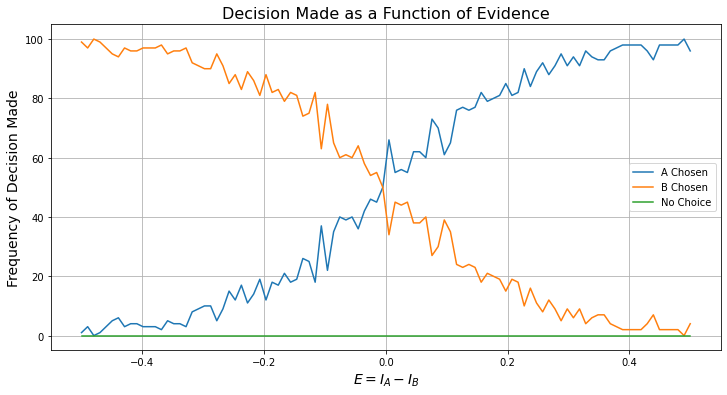

In [40]:
#plot frquencies as function of E 
plt.figure(figsize=(12,6))

#plot values 
plt.plot(E_vals, freq_arr3[0,:],label = 'A Chosen')
plt.plot(E_vals, freq_arr3[1,:],label = 'B Chosen')
plt.plot(E_vals, freq_arr3[2,:],label = 'No Choice')

#labels 
plt.xlabel("$E = I_A - I_B$",fontsize=14)
plt.ylabel("Frequency of Decision Made",fontsize=14)
plt.title("Decision Made as a Function of Evidence",fontsize=16)

#formatting + show
plt.legend();plt.grid()
plt.savefig("figures/freqE",dpi = dpi)
plt.show()

### 1.4 

In [14]:
#1.4 Reaction times distribution 

#new function used to gather reaction times 
def reaction_simulation(n=100, T=int(1e4), x0=0, dt=0.1, I_a = 0.95, I_b = 1, sigma=7,mu=20):
    global dx 
    
    #t_vals 
    t_vals = np.linspace(0,T*dt,T)
    reaction_times_A = []
    reaction_times_B = []
    
    #simulate 
    for i in range(n): 

        #get x_traj 
        x_vals = euler_traj(T, x0, dx,dt, I_a, I_b, sigma)

        #find where threshold is crossed for first time 
        mask = np.where(np.abs(x_vals)>mu)[0]

        #check if decision made 
        if mask.any(): 
            
            #get index 
            idx = mask[0]
            
            #store reaction times 
            if x_vals[idx]> mu:  
                reaction_times_A += [t_vals[idx]] 
                
            elif x_vals[idx]<mu: 
                reaction_times_B += [t_vals[idx]] 
            

    return reaction_times_A, reaction_times_B 

In [26]:
#run simulations - gather reaction time data
#np.random.seed(86)
np.random.seed(90)

I_b = 1 
n = 1000

RT_E0 = reaction_simulation(n=n, I_a = I_b)
RT_E1 = reaction_simulation(n=n, I_a = 0.01 + I_b)
RT_E5 = reaction_simulation(n=n, I_a = 0.05 + I_b)

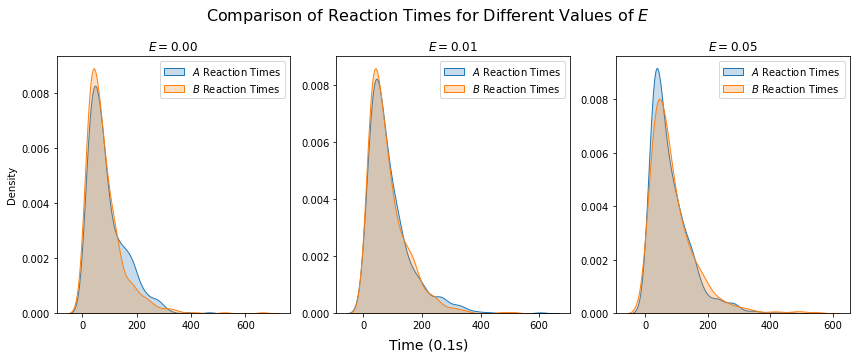

In [27]:
import seaborn as sns 

#plot using seaborn
fig,axs=plt.subplots(ncols=3,figsize = (12,5)) 

#displot for first reaction times 
sns.kdeplot(RT_E0[0],fill=True, label = '$A$ Reaction Times',ax=axs[0])
sns.kdeplot(RT_E0[1],fill=True, label = '$B$ Reaction Times',ax=axs[0])
axs[0].set_title('$E = 0.00$')
axs[0].legend()

#displot for second reaction times 
sns.kdeplot(RT_E1[0], fill=True, label = '$A$ Reaction Times',ax=axs[1])
sns.kdeplot(RT_E1[1], fill=True, label = '$B$ Reaction Times',ax=axs[1])
axs[1].set_title('$E = 0.01$')
axs[1].set(ylabel = None)
axs[1].legend()

#displot for third reaction times 
sns.kdeplot(RT_E5[0], fill=True, label = '$A$ Reaction Times',ax=axs[2])
sns.kdeplot(RT_E5[1], fill=True, label = '$B$ Reaction Times',ax=axs[2])
axs[2].set_title('$E = 0.05$')
axs[2].set(ylabel = None)
axs[2].legend()

#titles 
fig.suptitle("Comparison of Reaction Times for Different Values of $E$",fontsize=16)
fig.tight_layout(rect=[0, 0.05, 1, 1])
fig.text(0.5, 0.04, 'Time (0.1s)', ha='center', va='center',fontsize="14")

#plt.xlabel("Time (Seconds)"); plt.ylabel("Density")
#plt.legend()

#show plot 
fig.savefig("figures/3E_RT2__",dpi = dpi)